Importing the Dependencies


nltk means natural language toolkit 


stopwords are the words that have no influece 


porterstemmer will be used to remove the prefix and the suffix of the words (it gives us the root of a word)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

those words doesnt give much value to our text

In [2]:
print(stopwords.words("English"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data preprocessing

Loading the dataset

In [3]:
data = pd.read_csv("data.csv")

Checking the number of rows and columns

In [4]:
data.shape

(20800, 5)

Print the first 5 rows

In [5]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


dataset summary

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


creating a bar chart using matplotlib to visually represent the distribution of real and fake news

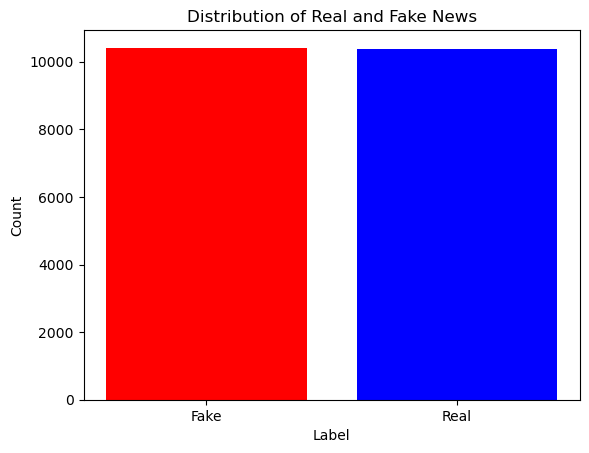

fake news : 10413 | real news : 10387


In [7]:
count_real = len(data[data.label==0])
count_fake = len(data[data.label==1])
labels=["Fake","Real"]
counts = [count_fake,count_real]
plt.bar(labels, counts, color=['red', 'blue'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Real and Fake News')
plt.show()
print(f"fake news : {count_fake} | real news : {count_real}")

ploating a pie chart of null and non_null values

In [8]:
count_null = data.isna().sum().sum()
count_not_null = data.notna().sum().sum()

Text(0.5, 1.0, 'Total Null and Not Null Values')

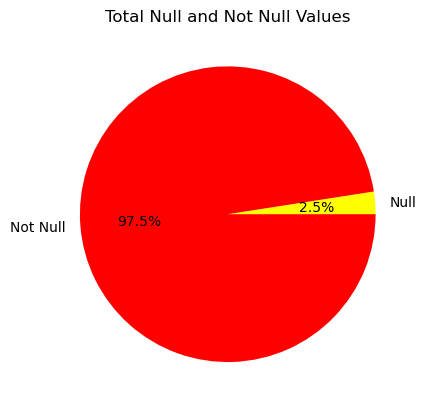

In [9]:
count_null,count_not_null
plt.pie([count_null,count_not_null],labels=["Null","Not Null"],colors=["yellow","red"],autopct='%.1f%%')
plt.title('Total Null and Not Null Values')

The number of missing values in each column

In [10]:
print("missing values :")
print(data.isna().sum())

missing values :
id           0
title      558
author    1957
text        39
label        0
dtype: int64


Replacing null values with empty string

In [11]:
data=data.fillna("")

In [12]:
print("missing values after handling :")
print(data.isna().sum())

missing values after handling :
id        0
title     0
author    0
text      0
label     0
dtype: int64


checking if there are any duplicted values

In [13]:
data.duplicated().sum()

0

Merging the author and the title columns

In [14]:
data["content"] = data["author"] + " " + data["title"]

In [15]:
data.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


specifying the feature and the target

In [16]:
x= data["content"].values
y= data["label"].values

stemming 
<< stemming means reducing a word to its root form >>

In [17]:
port_stem = PorterStemmer()

In [18]:
def stemming(content):
    stemmed_content = re.sub("[^a-zA-Z]"," ",content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words("English")]
    stemmed_content = " ".join(stemmed_content)
    return stemmed_content

In [19]:
data["content"] = data["content"].apply(stemming)
x=data["content"].values

In [20]:
data.head(30)

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrel lucu hous dem aid even see comey letter...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,daniel j flynn flynn hillari clinton big woman...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnew com truth might get fire
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss civilian kill singl us airstri...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoy iranian woman jail fiction unpu...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,daniel nussbaum jacki mason hollywood would lo...
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,,Ever wonder how Britain’s most iconic pop pian...,1,life life luxuri elton john favorit shark pict...
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,alissa j rubin beno hamon win french socialist...
8,8,Excerpts From a Draft Script for Donald Trump’...,,Donald J. Trump is scheduled to make a highly ...,0,excerpt draft script donald trump q ampa black...
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,megan twohey scott shane back channel plan ukr...


tf basically counts the number of times a word is repeating in a text the repetition tells the model that its an important word and it assignes a particular numerical value idf detects words that are not significants and gives them a value less important TfidfVectorizer create feature vectors


In [21]:
vectorizer = TfidfVectorizer()
vectorizer.fit(x)
X = vectorizer.transform(x)

In [22]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

Splitting the dataset to training and test data

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=2)

Training two models Logistic Regression and Random Forest Classifier 

In [24]:
lr = LogisticRegression()

In [25]:
lr.fit(x_train,y_train)

LogisticRegression()

In [26]:
rfc = RandomForestClassifier()

In [27]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

ploating the roc_aoc curves

Text(0, 0.5, 'True Positive Rate')

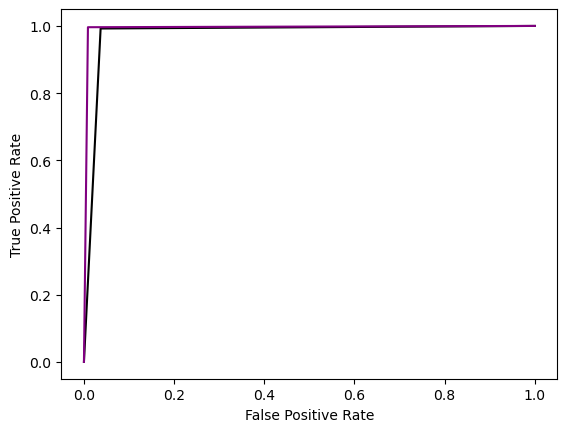

In [28]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr.predict(x_test))
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, rfc.predict(x_test))
plt.plot(fpr_lr,tpr_lr,color="black")
plt.plot(fpr_rfc,tpr_rfc,color="purple")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

making predictions and storing accuracy scores

In [29]:
y_pred_lr_train = lr.predict(x_train)
y_pred_rfc_train = rfc.predict(x_train)
y_pred_lr_test = lr.predict(x_test)
y_pred_rfc_test = rfc.predict(x_test)
score_lr_train =accuracy_score(y_train,y_pred_lr_train)
score_lr_test =accuracy_score(y_test,y_pred_lr_test)
score_rfc_train =accuracy_score(y_train,y_pred_rfc_train)
score_rfc_test =accuracy_score(y_test,y_pred_rfc_test)

In [30]:
print(f"acuracy_score using logitstic regression training : {score_lr_train:.3f} test :{score_lr_test:.3f}")

acuracy_score using logitstic regression training : 0.986 test :0.978


In [31]:
print(f"acuracy_score using random forest : {score_rfc_train:.3f} test :{score_rfc_test:.3f}")

acuracy_score using random forest : 1.000 test :0.994


In [32]:
cm_lr=confusion_matrix(y_test,y_pred_lr_test) 
cm_rfc=confusion_matrix(y_test,y_pred_rfc_test) 

In [33]:
print("Logistic Regression")
print(cm_lr)
print("Random Forest Classifier")
print(cm_rfc)

Logistic Regression
[[2501   96]
 [  20 2583]]
Random Forest Classifier
[[2574   23]
 [  10 2593]]


evaluating the performance of both the Random Forest and Logistic Regression algorithms using cross validation

In [34]:
cv_scores_rfc = cross_val_score(RandomForestClassifier(),X,y,cv=5,scoring='accuracy')
cv_scores_lr = cross_val_score(LogisticRegression(),X,y,cv=5,scoring='accuracy')
avg_score_rfc = cv_scores_rfc.mean()
avg_score_lr = cv_scores_lr.mean()
print("random forest classifier:", avg_score_rfc)
print("logistic regression:", avg_score_lr)

making a predictive system  

In [ ]:
def is_real(information):
    prediction=rfc.predict(information)
    return prediction[0]==0

In [ ]:
is_real(x_test[0])

True

In [ ]:
print(y_test[0]== 0)

True
